# Interpolation

This notebook uses the [Interpolations.jl](https://github.com/JuliaMath/Interpolations.jl) package. As alternatives, consider [Dierckx.jl](https://github.com/kbarbary/Dierckx.jl) and [DataInterpolations.jl](https://github.com/PumasAI/DataInterpolations.jl).

## Load Packages and Extra Functions

In [1]:
using Printf, Interpolations

include("jlFiles/printmat.jl")

printyellow (generic function with 1 method)

In [2]:
using Plots

gr(size=(480,320))
default(fmt = :png)

# Interpolation of y = f(x)

Interpolations are particularly useful when *(a)* we repeatedly want to evaluate a function $f(x)$ that is time consuming to calculate but we are willing to accept approximate results, or *(b)* when we only know $f(x)$ for a grid of $x$ values but we are willing to assume that the function is pretty smooth (perhaps even linear over short intervals).

In either case, we do something like this:

1. Calculate $f(x)$ values for a grid of $x$. This creates a "look-up" table.
2. Replace the calculation of $f(x_i)$ by interpolating $f(x_i)$ from the "look-up" table.

## Some Values to Be Interpolated

As a simple illustration, we interpolate the sine function. (In practice, the interpolation technique is typically applied to more complicated functions.)

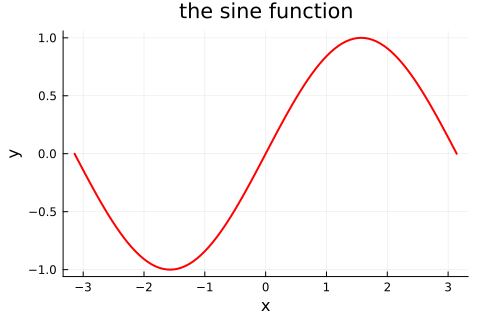

In [3]:
xGrid = range(-pi,pi,length=101)  #uniformly spaced grid
yGrid = sin.(xGrid)               #y values at xGrid

p1 = plot( xGrid,yGrid,
           linecolor = :red,
           linewidth = 2,
           legend = nothing,
           title = "the sine function",
           xlabel = "x",
           ylabel = "y" )
display(p1)

## Interpolate

The next cell calls on `cubic_spline_interpolation()` to create the "look-up" table (more precisely, create an interpolation object). 

To use a cubic spline it is required that the $x_i$ grid is *uniformly spaced* (for instance, 0.1,0.2,...). Actually, it has to be a `range`. The case of a non-uniformly spaced $x$ grid is discussed later.

The option `extrapolation_bc=...` determines how extrapolation beyond the range of the $x_i$ grid is done.

The second cell interpolates and extrapolates $y$ at some specific $x$ values.

In [4]:
itp = cubic_spline_interpolation(xGrid,yGrid,extrapolation_bc=Flat());

In [5]:
x  = [0.25,0.75,1.25]                          #to interpolate the y values at

y_interpolated = itp(x)
printmat([x y_interpolated sin.(x)],colNames=["x","interpolated y","true y"],width=17)

x2             = [pi+0.1,pi+0.5]                 #to extrapolate the y values at
y_extrapolated = itp(x2)  
                                                
printmat([x2 y_extrapolated],colNames=["x2","extrapolated y"],width=17)

                x   interpolated y           true y
            0.250            0.247            0.247
            0.750            0.682            0.682
            1.250            0.949            0.949

               x2   extrapolated y
            3.242            0.000
            3.642            0.000



## Plotting the Results

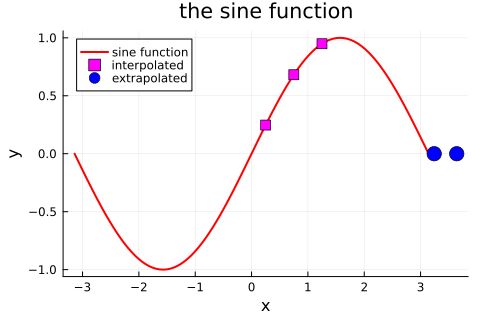

In [6]:
p1 = plot( xGrid,yGrid,
           linecolor = :red,
           linewidth = 2,
           label = "sine function",
           title = "the sine function",
           xlabel = "x",
           ylabel = "y" )
scatter!(x,y_interpolated,markercolor=:magenta,markersize=5,marker=:square,label="interpolated")
scatter!(x2,y_extrapolated,markercolor=:blue,markersize=8,label="extrapolated")
display(p1)

# Interpolation of y = f(x) for General Vectors

That is, when we cannot guarantee that the look-up table of $y_i=f(x_i)$ is from uniformly spaced $x_i$ values (the grid is irregular). This is useful, for instance, when we have empirical data on $(x_i,y_i)$.

The approach works similar to before, except that the `cubic_spline_interpolation` must be replaced by `linear_interpolation`.

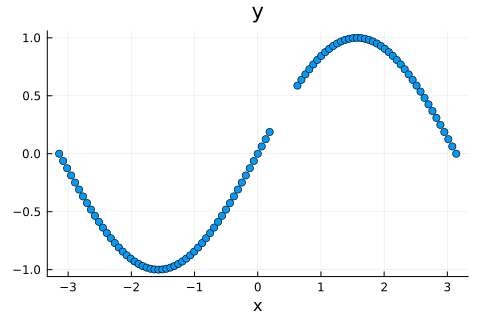

In [7]:
xGrid2 = deleteat!(collect(xGrid),55:60)         #non-uniformly spaced grid
yGrid2 = sin.(xGrid2)

p1 = scatter( xGrid2,yGrid2,
              linecolor = :red,
              legend = false,
              title = "y",
              xlabel = "x" )
display(p1)

In [8]:
itp2 = linear_interpolation(xGrid2,yGrid2,extrapolation_bc=Flat())

y_interpolated = itp2(x)
printmat([x y_interpolated sin.(x)],colNames=["x","interpolated y","true y"],width=17)

y_extrapolated = itp2(x2)
printmat([x2 y_extrapolated],colNames=["x2","extrapolated y"],width=17)

                x   interpolated y           true y
            0.250            0.243            0.247
            0.750            0.682            0.682
            1.250            0.949            0.949

               x2   extrapolated y
            3.242            0.000
            3.642            0.000

